Graph Constrained Unmixing w/ Normalized Cuts

In [3]:
# Imports
#import os
import numpy as np
import matplotlib.pyplot as plt
# import h5py as h5
import scipy as sp
# Configs for Notebooks
plt.rcParams["figure.figsize"] = [9,7]
np.set_printoptions(suppress=True)

In [4]:
dataset_name = 'Salinas B'
hyperspectral_cube = sp.io.loadmat("data/Salinas_corrected.mat")['salinas_corrected'] # Load Dataset
ground_truth = sp.io.loadmat("data/Salinas_gt.mat")['salinas_gt']
# #ground_truth = np.vectorize(lambda x: {0: 0, 4:1, 5:2, 6:3, 7:4, 8:5, 15:6}[x])(ground_truth)
# ground_truth = np.vectorize(lambda x: {0: 0, 4:1, 5:1, 6:2, 7:3, 8:4, 15:5}[x])(ground_truth)
nx, ny, nb = hyperspectral_cube.shape
print(hyperspectral_cube.shape)

(512, 217, 204)


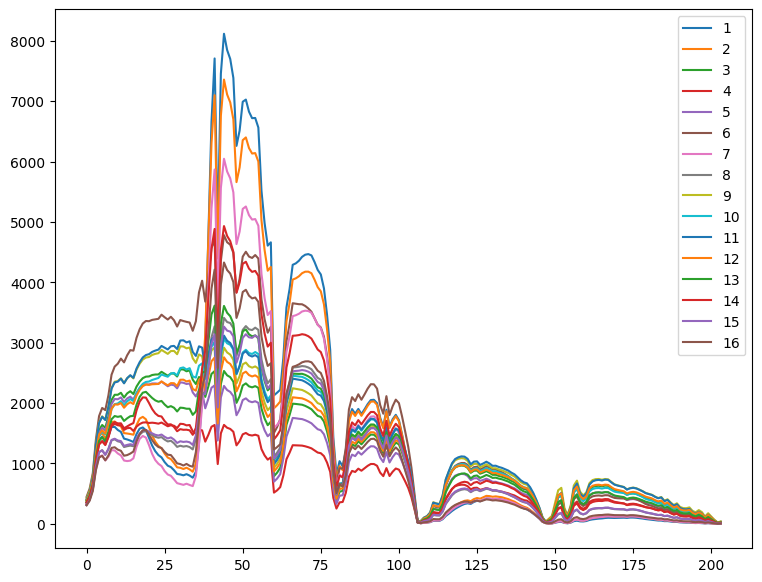

In [23]:
for k in np.unique(ground_truth):
    if k!= 0:
        a = hyperspectral_cube[np.where(ground_truth == k)].mean(axis = 0).copy()
        plt.plot(a, label = k)
plt.legend();
plt.xax
        

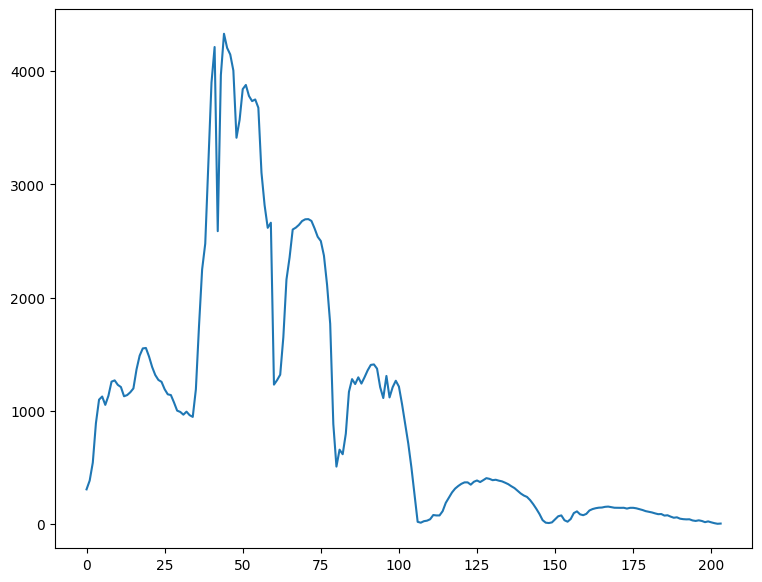

In [17]:
plt.plot(a)

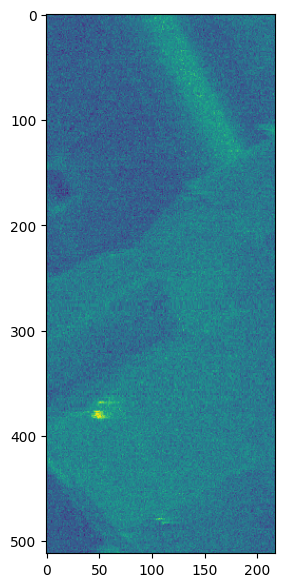

In [3]:
plt.imshow(hyperspectral_cube[:,:,0])

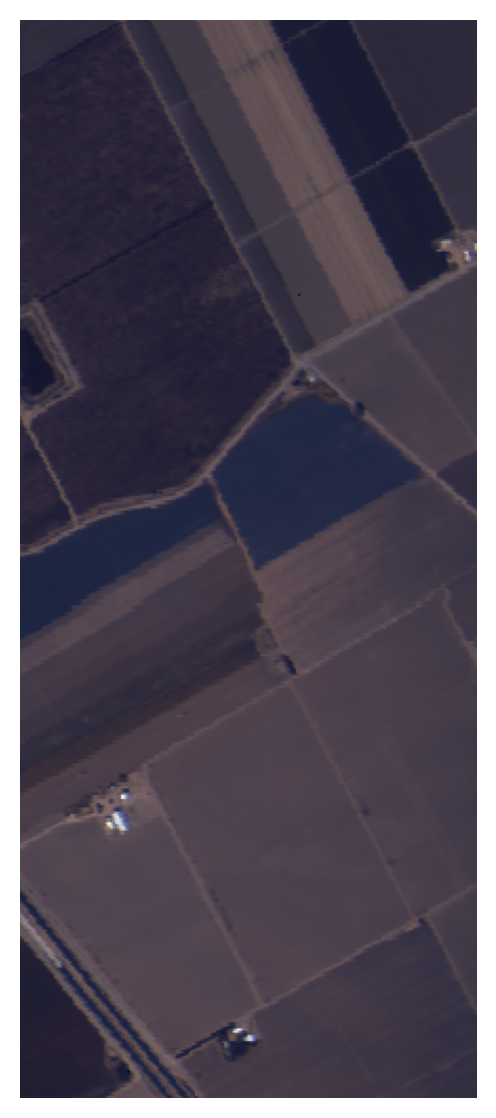

In [8]:
## Plot Image
def colorize_hsi(data, start_nm, n_bands, step_size_nm):
    """
    Colorizes a hyperspectral image using selected bands for the red, green, and blue channels.
    """
    # Calculate ending wavelength
    ending_wavelength = start_nm + (n_bands * step_size_nm)
    red_wavelength = 650  # Wavelength for red channel
    green_wavelength = 550  # Wavelength for green channel
    blue_wavelength = 450  # Wavelength for blue channel

    red_idx = int((red_wavelength - start_nm) / step_size_nm)
    green_idx = int((green_wavelength - start_nm) / step_size_nm)
    blue_idx = int((blue_wavelength - start_nm) / step_size_nm)

    norm_red_band = (data[:,:,red_idx] - np.min(data[:,:,red_idx])) / (np.max(data[:,:,red_idx]) - np.min(data[:,:,red_idx]))
    norm_green_band = (data[:,:,green_idx] - np.min(data[:,:,green_idx])) / (np.max(data[:,:,green_idx]) - np.min(data[:,:,green_idx]))
    norm_blue_band = (data[:,:,blue_idx] - np.min(data[:,:,blue_idx])) / (np.max(data[:,:,blue_idx]) - np.min(data[:,:,blue_idx]))

    regular_colorized_image = np.stack((data[:,:,red_idx], data[:,:,green_idx], data[:,:,blue_idx]), axis=-1)
    normalized_colorized_image = np.stack((norm_red_band, norm_green_band, norm_blue_band), axis=-1)
    return normalized_colorized_image, regular_colorized_image

hyperspectral_image_colorized = colorize_hsi(hyperspectral_cube, 400, 204, 10.2)[0]
fig, ax = plt.subplots(1,1, dpi=200);
ax.imshow(hyperspectral_image_colorized);
plt.axis('off');  # Turn off axis if not needed

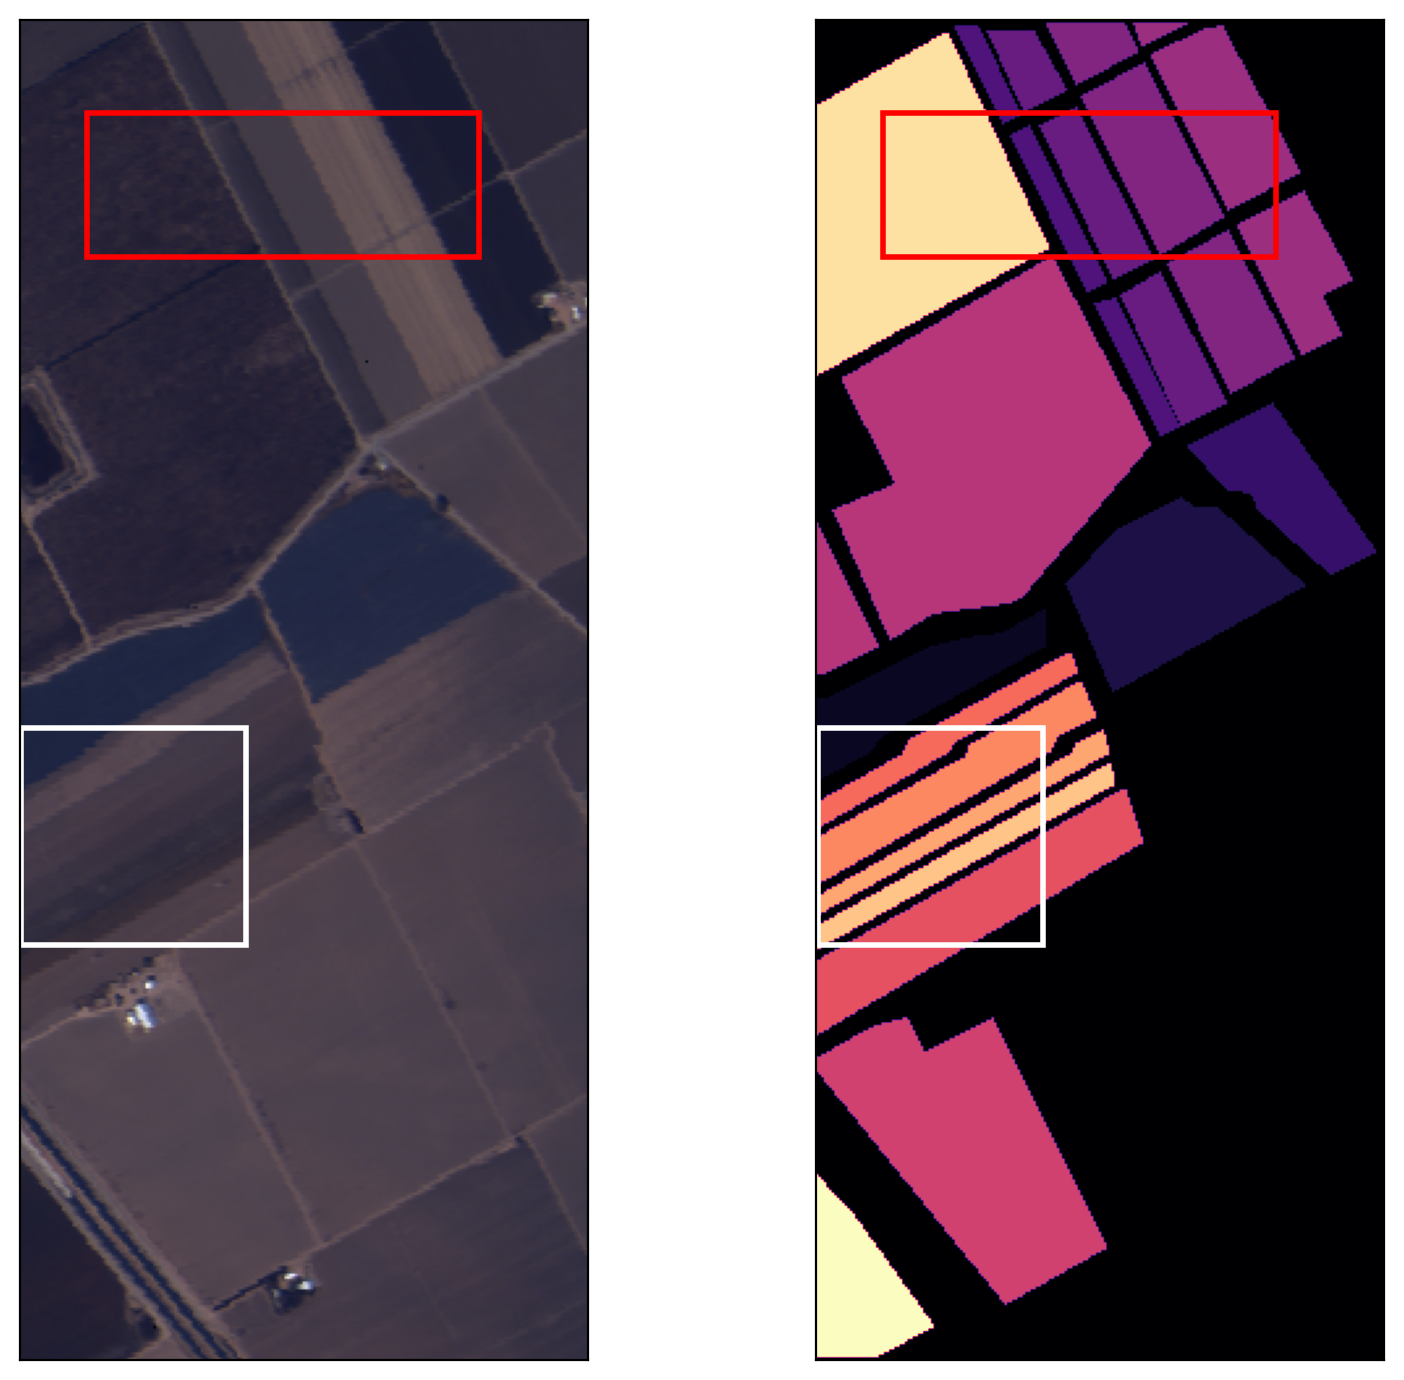

In [54]:
from matplotlib.patches import Rectangle
hyperspectral_image_colorized = colorize_hsi(hyperspectral_cube, 400, 204, 10.2)[0]
fig, ax = plt.subplots(1,2, dpi=200);
ax[0].imshow(hyperspectral_image_colorized);
# 591-676, 158-240
rect_a = Rectangle((0,270),86,83,linewidth=2,edgecolor='w',facecolor='none')
# [35:90,0:175]
rect_b = Rectangle((25,35),150,55,linewidth=2,edgecolor='r',facecolor='none')
# rect_c = Rectangle((345,545),95,95,linewidth=1,edgecolor='g',facecolor='none')

# Add the patch to the Axes
ax[0].add_patch(rect_a);
ax[0].add_patch(rect_b);

rect_a_2 = Rectangle((0,270),86,83,linewidth=2,edgecolor='w',facecolor='none')
# [35:90,0:175]
rect_b_2 = Rectangle((25,35),150,55,linewidth=2,edgecolor='r',facecolor='none')

ax[1].add_patch(rect_a_2);
ax[1].add_patch(rect_b_2);
# ax.add_patch(rect_c);

ax[1].imshow(ground_truth, cmap = 'magma');
ax[0].set_xticks([]);
ax[0].set_yticks([]);
ax[1].set_xticks([]);
ax[1].set_yticks([]);
plt.tight_layout();
